In [3]:
from pybaseball import statcast
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import playerid_lookup
import numpy as np
from pybaseball import statcast_batter

In [4]:
#statcast(start_dt='2018-03-29', end_dt='2018-09-30').to_csv(path_or_buf='/Users/Joe/Documents/Baseball/statcast_2018.txt')

In [7]:
stats = pd.read_csv('/Users/Joe/Documents/SabermetricsFinal/statcast_2018.csv')

In [ ]:
stats = stats.loc[stats['events'].notnull()].copy()
stats.to_csv()

In [305]:
#list(stats)

In [306]:
#Get our initial two dataframes of any sort of shifted alignment and all standard alignment
stats = stats.dropna(subset=['if_fielding_alignment', 'of_fielding_alignment'])
stats_shift = stats.loc[(stats['if_fielding_alignment'] != 'Standard') | (stats['of_fielding_alignment'] != 'Standard')]
stats_standard = stats.loc[(stats['if_fielding_alignment'] == 'Standard') & (stats['of_fielding_alignment'] == 'Standard')]

In [307]:
#Separate these into early, mid, and late season
shift_early = stats_shift.loc[stats_shift['game_date'].str.contains('2018-04') | stats_shift['game_date'].str.contains('2018-05')]
shift_mid = stats_shift.loc[stats['game_date'].str.contains('2018-06') | stats_shift['game_date'].str.contains('2018-07')]
shift_late = stats_shift.loc[stats['game_date'].str.contains('2018-08') | stats_shift['game_date'].str.contains('2018-09')]


In [308]:
#Separate standard into early, mid, and late season as well
standard_early = stats_standard.loc[stats_standard['game_date'].str.contains('2018-04') | stats_standard['game_date'].str.contains('2018-05')]
standard_mid = stats_standard.loc[stats['game_date'].str.contains('2018-06') | stats_standard['game_date'].str.contains('2018-07')]
standard_late = stats_standard.loc[stats['game_date'].str.contains('2018-08') | stats_standard['game_date'].str.contains('2018-09')]


In [309]:
#We want dataframes for all the hit events and all the at-bat events so we can eventually calculate an average
#Slight caveat though. I am including sac fly as a 'hit' because I believe if you move a runner up or score a run
#on a sacrifice fly you still did your job, and thus beat the shift.
#I don't believe the same applies to a sac bunt since bunts have virtually no chance of leaving the infield regardless of shift
shift_early_hits = shift_early.loc[(shift_early['events'] == 'single') | (shift_early['events'] == 'double') | (shift_early['events'] == 'triple') | (shift_early['events'] == 'home_run') | (shift_early['events'] == 'sac_fly')]
shift_mid_hits = shift_mid.loc[(shift_mid['events'] == 'single') | (shift_mid['events'] == 'double') | (shift_mid['events'] == 'triple') | (shift_mid['events'] == 'home_run') | (shift_mid['events'] == 'sac_fly')]
shift_late_hits = shift_late.loc[(shift_late['events'] == 'single') | (shift_late['events'] == 'double') | (shift_late['events'] == 'triple') | (shift_late['events'] == 'home_run') | (shift_late['events'] == 'sac_fly')]

shift_early_ab = shift_early.loc[(shift_early['events'] == 'field_out') | (shift_early['events'] == 'strikeout') | (shift_early['events'] == 'single') | (shift_early['events'] == 'double') | (shift_early['events'] == 'grounded_into_double_play') | (shift_early['events'] == 'home_run') | (shift_early['events'] == 'double_play') | (shift_early['events'] == 'triple') | (shift_early['events'] == 'sac_fly') | (shift_early['events'] == 'force_out') | (shift_early['events'] == 'field_error') | (shift_early['events'] == 'fielders_choice_out') | (shift_early['events'] == 'strikeout_double_play') | (shift_early['events'] == 'sac_fly_double_play') | (shift_early['events'] == 'fielders_chocie') | (shift_early['events'] == 'other_out') | (shift_early['events'] == 'triple_play')]
shift_mid_ab = shift_mid.loc[(shift_mid['events'] == 'field_out') | (shift_mid['events'] == 'strikeout') | (shift_mid['events'] == 'single') | (shift_mid['events'] == 'double') | (shift_mid['events'] == 'grounded_into_double_play') | (shift_mid['events'] == 'home_run') | (shift_mid['events'] == 'double_play') | (shift_mid['events'] == 'triple') | (shift_mid['events'] == 'sac_fly') | (shift_mid['events'] == 'force_out') | (shift_mid['events'] == 'field_error') | (shift_mid['events'] == 'fielders_choice_out') | (shift_mid['events'] == 'strikeout_double_play') | (shift_mid['events'] == 'sac_fly_double_play') | (shift_mid['events'] == 'fielders_chocie') | (shift_mid['events'] == 'other_out') | (shift_mid['events'] == 'triple_play')]
shift_late_ab = shift_late.loc[(shift_late['events'] == 'field_out') | (shift_late['events'] == 'strikeout') | (shift_late['events'] == 'single') | (shift_late['events'] == 'double') | (shift_late['events'] == 'grounded_into_double_play') | (shift_late['events'] == 'home_run') | (shift_late['events'] == 'double_play') | (shift_late['events'] == 'triple') | (shift_late['events'] == 'sac_fly') | (shift_late['events'] == 'force_out') | (shift_late['events'] == 'field_error') | (shift_late['events'] == 'fielders_choice_out') | (shift_late['events'] == 'strikeout_double_play') | (shift_late['events'] == 'sac_fly_double_play') | (shift_late['events'] == 'fielders_chocie') | (shift_late['events'] == 'other_out') | (shift_late['events'] == 'triple_play')]


In [311]:
#These are the same slices as above but for our standard alignment
standard_early_hits = standard_early.loc[(standard_early['events'] == 'single') | (standard_early['events'] == 'double') | (standard_early['events'] == 'triple') | (standard_early['events'] == 'home_run') | (standard_early['events'] == 'sac_fly')]
standard_mid_hits = standard_mid.loc[(standard_mid['events'] == 'single') | (standard_mid['events'] == 'double') | (standard_mid['events'] == 'triple') | (standard_mid['events'] == 'home_run') | (standard_mid['events'] == 'sac_fly')]
standard_late_hits = standard_late.loc[(standard_late['events'] == 'single') | (standard_late['events'] == 'double') | (standard_late['events'] == 'triple') | (standard_late['events'] == 'home_run') | (standard_late['events'] == 'sac_fly')]

standard_early_ab = standard_early.loc[(standard_early['events'] == 'field_out') | (standard_early['events'] == 'strikeout') | (standard_early['events'] == 'single') | (standard_early['events'] == 'double') | (standard_early['events'] == 'grounded_into_double_play') | (standard_early['events'] == 'home_run') | (standard_early['events'] == 'double_play') | (standard_early['events'] == 'triple') | (standard_early['events'] == 'sac_fly') | (standard_early['events'] == 'force_out') | (standard_early['events'] == 'field_error') | (standard_early['events'] == 'fielders_choice_out') | (standard_early['events'] == 'strikeout_double_play') | (standard_early['events'] == 'sac_fly_double_play') | (standard_early['events'] == 'fielders_chocie') | (standard_early['events'] == 'other_out') | (standard_early['events'] == 'triple_play')]
standard_mid_ab = standard_mid.loc[(standard_mid['events'] == 'field_out') | (standard_mid['events'] == 'strikeout') | (standard_mid['events'] == 'single') | (standard_mid['events'] == 'double') | (standard_mid['events'] == 'grounded_into_double_play') | (standard_mid['events'] == 'home_run') | (standard_mid['events'] == 'double_play') | (standard_mid['events'] == 'triple') | (standard_mid['events'] == 'sac_fly') | (standard_mid['events'] == 'force_out') | (standard_mid['events'] == 'field_error') | (standard_mid['events'] == 'fielders_choice_out') | (standard_mid['events'] == 'strikeout_double_play') | (standard_mid['events'] == 'sac_fly_double_play') | (standard_mid['events'] == 'fielders_chocie') | (standard_mid['events'] == 'other_out') | (standard_mid['events'] == 'triple_play')]
standard_late_ab = standard_late.loc[(standard_late['events'] == 'field_out') | (standard_late['events'] == 'strikeout') | (standard_late['events'] == 'single') | (standard_late['events'] == 'double') | (standard_late['events'] == 'grounded_into_double_play') | (standard_late['events'] == 'home_run') | (standard_late['events'] == 'double_play') | (standard_late['events'] == 'triple') | (standard_late['events'] == 'sac_fly') | (standard_late['events'] == 'force_out') | (standard_late['events'] == 'field_error') | (standard_late['events'] == 'fielders_choice_out') | (standard_late['events'] == 'strikeout_double_play') | (standard_late['events'] == 'sac_fly_double_play') | (standard_late['events'] == 'fielders_chocie') | (standard_late['events'] == 'other_out') | (standard_late['events'] == 'triple_play')]


In [313]:
#For the sake of typing I'm going to abbreviate 'shift early hits' to 'seh', 'shift mid hits' to 'smh' and so on.
#This will give us the number of hits each batter got when the shift was on.
seh_group = shift_early_hits.groupby(['batter']).size()
smh_group = shift_mid_hits.groupby(['batter']).size()
slh_group = shift_late_hits.groupby(['batter']).size()

#This will give us the number of plate appearances each batter got when the shift was on.
#We'll use 'se_ab' to stand for 'shift early at bat' and same convention for mid and late.
se_ab_group = shift_early_ab.groupby(['batter']).size()
sm_ab_group = shift_mid_ab.groupby(['batter']).size()
sl_ab_group = shift_late_ab.groupby(['batter']).size()

In [314]:
#For the non-shift situations I will use the abbreviation 'stan_eh' to mean 'standard early hits.' Not the 
#most concise but it gets the job done.
#This will give the number of hits each batter had without any shift on.
stan_eh_group = standard_early_hits.groupby(['batter']).size()
stan_mh_group = standard_mid_hits.groupby(['batter']).size()
stan_lh_group = standard_late_hits.groupby(['batter']).size()

#Now we will find the number of at bats each batter had without a shift one.
#Here I will use 'stan_eab' to mean 'standard early at bat' and so on.
stan_eab_group = standard_early_ab.groupby(['batter']).size()
stan_mab_group = standard_mid_ab.groupby(['batter']).size()
stan_lab_group = standard_late_ab.groupby(['batter']).size()

In [315]:
#Let's turn them all into dictionaries so we can actually do things with them
seh_group = seh_group.to_dict()
smh_group = smh_group.to_dict()
slh_group = slh_group.to_dict()
se_ab_group = se_ab_group.to_dict()
sm_ab_group = sm_ab_group.to_dict()
sl_ab_group = sl_ab_group.to_dict()

stan_eh_group = stan_eh_group.to_dict()
stan_mh_group = stan_mh_group.to_dict()
stan_lh_group = stan_lh_group.to_dict()
stan_eab_group = stan_eab_group.to_dict()
stan_mab_group = stan_mab_group.to_dict()
stan_lab_group = stan_lab_group.to_dict()

In [354]:
'''
This function takes in a players first and last name and then returns the following:
* early season shift average
* early season standard alignment average
* mid season shift average
* mid season standard alignment average
* late season shift average
* late season standard alignment average

If 'verbose' is set to True, then the function will also print all of these 
values in a nice format.
'''
def player_shift(last_name, first_name, verbose = False):
    id_num = playerid_lookup(last_name, first_name)['key_mlbam']
    print()
    if len(id_num) == 0:
        return "Not a valid player name."
    id_num = int(id_num)
    
    if id_num in se_ab_group:
        if id_num in seh_group:
            early_shift_avg = seh_group[id_num] / se_ab_group[id_num]
        else:
            early_shift_avg = 0
    if id_num in sm_ab_group:
        if id_num in smh_group:
            mid_shift_avg = smh_group[id_num] / sm_ab_group[id_num]
        else:
            mid_shift_avg = 0
    if id_num in sl_ab_group:
        if id_num in slh_group:
            late_shift_avg = slh_group[id_num] / sl_ab_group[id_num]
        else:
            late_shift_avg = 0
            
    if id_num in stan_eab_group:
        if id_num in stan_eh_group:
            early_stan_avg = stan_eh_group[id_num] / stan_eab_group[id_num]
        else:
            early_stan_avg = 0
    if id_num in stan_mab_group:
        if id_num in stan_mh_group:
            mid_stan_avg = stan_mh_group[id_num] / stan_mab_group[id_num]
        else:
            mid_stan_avg = 0
    if id_num in stan_lab_group:
        if id_num in stan_lh_group:
            late_stan_avg = stan_lh_group[id_num] / stan_lab_group[id_num]
        else:
            late_stan_avg = 0
    
    if verbose == True:
        print(first_name + " " + last_name + " early shift average: {:.3f}".format(early_shift_avg))
        print(first_name + " " + last_name + " early standard average: {:.3f}".format(early_stan_avg))
        print()
        print(first_name + " " + last_name + " mid shift average: {:.3f}".format(mid_shift_avg))
        print(first_name + " " + last_name + " mid standard average: {:.3f}".format(mid_stan_avg))
        print()
        print(first_name + " " + last_name + " late shift average: {:.3f}".format(late_shift_avg))
        print(first_name + " " + last_name + " late standard average: {:.3f}".format(late_stan_avg))
    
    return early_shift_avg, early_stan_avg, mid_shift_avg, mid_stan_avg, late_shift_avg, late_stan_avg

Gathering player lookup table. This may take a moment.

mike trout early shift average: 0.277
mike trout early standard average: 0.325

mike trout mid shift average: 0.274
mike trout mid standard average: 0.374

mike trout late shift average: 0.222
mike trout late standard average: 0.373


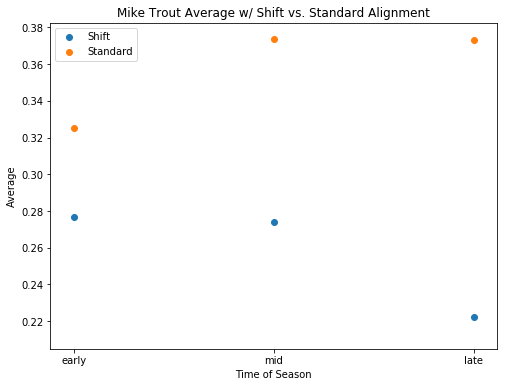

In [318]:
#A quick proof-of-concept of sorts using our new function
#We now have shift data for Mike Trout, and can plot it to see how his average changes throughout
#the season and compare that to when the infield or outfield is in a standard alignment

y = list(player_shift("trout", "mike", verbose=True))
y1 = [y[0], y[2], y[4]]
y2 = [y[1], y[3], y[5]]
x = ['early', 'mid', 'late']

fig,ax = plt.subplots(figsize=(8,6))
plt.scatter(x, y1, label="Shift")
plt.scatter(x, y2, label="Standard")
plt.title("Mike Trout Average w/ Shift vs. Standard Alignment")
plt.xlabel("Time of Season")
plt.ylabel("Average")
plt.legend()


In [319]:
#We want to turn the shift average into a rating, with 100 as the average player
#To do this we need to find the league average shift average in 2018
#Below we simply finding the at bats and hits for the whole season instead of early, mid, late
stats_shift_h = stats_shift.loc[(stats_shift['events'] == 'single') | (stats_shift['events'] == 'double') | (stats_shift['events'] == 'triple') | (stats_shift['events'] == 'home_run') | (stats_shift['events'] == 'sac_fly')]
stats_shift_ab = stats_shift.loc[(stats_shift['events'] == 'field_out') | (stats_shift['events'] == 'strikeout') | (stats_shift['events'] == 'single') | (stats_shift['events'] == 'double') | (stats_shift['events'] == 'grounded_into_double_play') | (stats_shift['events'] == 'home_run') | (stats_shift['events'] == 'double_play') | (stats_shift['events'] == 'triple') | (stats_shift['events'] == 'sac_fly') | (stats_shift['events'] == 'force_out') | (stats_shift['events'] == 'field_error') | (stats_shift['events'] == 'fielders_choice_out') | (stats_shift['events'] == 'strikeout_double_play') | (stats_shift['events'] == 'sac_fly_double_play') | (stats_shift['events'] == 'fielders_chocie') | (stats_shift['events'] == 'other_out') | (stats_shift['events'] == 'triple_play')]

In [320]:
#We are doing the same slice as above but with standard fielding alignment
stats_standard_h = stats_standard.loc[(stats_standard['events'] == 'single') | (stats_standard['events'] == 'double') | (stats_standard['events'] == 'triple') | (stats_standard['events'] == 'home_run') | (stats_standard['events'] == 'sac_fly')]
stats_standard_ab = stats_standard.loc[(stats_standard['events'] == 'field_out') | (stats_standard['events'] == 'strikeout') | (stats_standard['events'] == 'single') | (stats_standard['events'] == 'double') | (stats_standard['events'] == 'grounded_into_double_play') | (stats_standard['events'] == 'home_run') | (stats_standard['events'] == 'double_play') | (stats_standard['events'] == 'triple') | (stats_standard['events'] == 'sac_fly') | (stats_standard['events'] == 'force_out') | (stats_standard['events'] == 'field_error') | (stats_standard['events'] == 'fielders_choice_out') | (stats_standard['events'] == 'strikeout_double_play') | (stats_standard['events'] == 'sac_fly_double_play') | (stats_standard['events'] == 'fielders_chocie') | (stats_standard['events'] == 'other_out') | (stats_standard['events'] == 'triple_play')]

In [321]:
#Below we turn our slices into dataframes and then merge them so we have hits and at bats in one
#frame so we can calculate average as another column

shift_h_group = stats_shift_h.groupby(['batter']).size()
shift_h = shift_h_group.to_frame()
shift_h.columns = ['h']

shift_ab_group = stats_shift_ab.groupby(['batter']).size()
shift_ab = shift_ab_group.to_frame()
shift_ab.columns = ['ab']

shift = shift_h.join(shift_ab, how='inner')

shift['avg'] = shift['h'] / shift['ab']

In [322]:
#Same as above but with standard fielding alignment
standard_h_group = stats_standard_h.groupby(['batter']).size()
standard_h = standard_h_group.to_frame()
standard_h.columns = ['h']

standard_ab_group = stats_standard_ab.groupby(['batter']).size()
standard_ab = standard_ab_group.to_frame()
standard_ab.columns = ['ab']

standard = standard_h.join(standard_ab, how='inner')

standard['avg'] = standard['h'] / standard['ab']

In [323]:
#This is the league wide mean value for average with both type of fielding alignment
shift_mean = shift['avg'].mean()
stan_mean = standard['avg'].mean()

In [324]:
#To create a rating, we need to find how much of an increase in average relates to a one point increase in rating
shift_point = shift_mean / 100
stan_point = stan_mean / 100

In [325]:
#We can now use the above calculated values to assign each batter a shift rating where 100 is league average.
shift['shift_rating'] = round(((shift['avg'] - shift_mean) / shift_point) + 100, 0)
standard['stan_rating'] = round(((standard['avg'] - stan_mean) / stan_point) + 100, 0)

shift = shift.sort_values(by=['shift_rating'], ascending=False)
standard = standard.sort_values(by=['stan_rating'], ascending=False)

shift_active = shift.loc[shift['ab'] > 100]
standard_active = standard.loc[standard['ab'] > 100]

good_id = int(shift_active[shift_active['shift_rating'] == shift_active['shift_rating'].max()].index[0])
good_id

572816

In [357]:
#All of the calculations performed above for the entire season are now applied to our early, mid, and late season frames
#'seh' stands for 'shift early hits'
#'se_ab' stands for 'shift early at bats'
#The convention continues like that

seh = pd.DataFrame.from_dict(seh_group, orient='index')
seh.columns = ['h']
smh = pd.DataFrame.from_dict(smh_group, orient='index')
smh.columns = ['h']
slh = pd.DataFrame.from_dict(slh_group, orient='index')
slh.columns = ['h']

se_ab = pd.DataFrame.from_dict(se_ab_group, orient='index')
se_ab.columns = ['ab']
sm_ab = pd.DataFrame.from_dict(sm_ab_group, orient='index')
sm_ab.columns = ['ab']
sl_ab = pd.DataFrame.from_dict(sl_ab_group, orient='index')
sl_ab.columns = ['ab']

se_avg = seh.join(se_ab, how='inner')
sm_avg = smh.join(sm_ab, how='inner')
sl_avg = slh.join(sl_ab, how='inner')

In [358]:
#Same as above but for standard alignment
#'stan_eh' stands for 'standard early hits'
#'stan_eab' stands for 'standard early at bats'
#The convention continues like that

stan_eh = pd.DataFrame.from_dict(stan_eh_group, orient='index')
stan_eh.columns = ['h']
stan_mh = pd.DataFrame.from_dict(stan_mh_group, orient='index')
stan_mh.columns = ['h']
stan_lh = pd.DataFrame.from_dict(stan_lh_group, orient='index')
stan_lh.columns = ['h']

stan_eab = pd.DataFrame.from_dict(stan_eab_group, orient='index')
stan_eab.columns = ['ab']
stan_mab = pd.DataFrame.from_dict(stan_mab_group, orient='index')
stan_mab.columns = ['ab']
stan_lab = pd.DataFrame.from_dict(stan_lab_group, orient='index')
stan_lab.columns = ['ab']

stan_e_avg = stan_eh.join(stan_eab, how='inner')
stan_m_avg = stan_mh.join(stan_mab, how='inner')
stan_l_avg = stan_lh.join(stan_lab, how='inner')

In [359]:
se_avg['avg'] = se_avg['h'] / se_avg['ab']
sm_avg['avg'] = sm_avg['h'] / sm_avg['ab']
sl_avg['avg'] = sl_avg['h'] / sl_avg['ab']
stan_e_avg['avg'] = stan_e_avg['h'] / stan_e_avg['ab']
stan_m_avg['avg'] = stan_m_avg['h'] / stan_m_avg['ab']
stan_l_avg['avg'] = stan_l_avg['h'] / stan_l_avg['ab']

#shift['shift_rating'] = round(((shift['avg'] - shift_mean) / shift_point) + 100, 0)
#standard['stan_rating'] = round(((standard['avg'] - stan_mean) / stan_point) + 100, 0)

se_avg['shift_rating'] = round(((se_avg['avg'] - shift_mean) / shift_point) + 100, 0)
sm_avg['shift_rating'] = round(((sm_avg['avg'] - shift_mean) / shift_point) + 100, 0)
sl_avg['shift_rating'] = round(((sl_avg['avg'] - shift_mean) / shift_point) + 100, 0)

stan_e_avg['stan_rating'] = round(((stan_e_avg['avg'] - stan_mean) / stan_point) + 100, 0)
stan_m_avg['stan_rating'] = round(((stan_m_avg['avg'] - stan_mean) / stan_point) + 100, 0)
stan_l_avg['stan_rating'] = round(((stan_l_avg['avg'] - stan_mean) / stan_point) + 100, 0)

In [360]:
#Nowe we can create sorted lists by shift rating and standard alignment rating for each player
#during early, mid, and late season

se_avg = se_avg.sort_values(by=['shift_rating'], ascending=False)
sm_avg = sm_avg.sort_values(by=['shift_rating'], ascending=False)
sl_avg = sl_avg.sort_values(by=['shift_rating'], ascending=False)

stan_e_avg = stan_e_avg.sort_values(by=['stan_rating'], ascending=False)
stan_m_avg = stan_m_avg.sort_values(by=['stan_rating'], ascending=False)
stan_l_avg = stan_l_avg.sort_values(by=['stan_rating'], ascending=False)

In [365]:
#Now let's try to make a list of the best 'shift beaters'

se_active = se_avg.loc[se_avg['ab'] >= 75]
sm_active = sm_avg.loc[sm_avg['ab'] >= 75]
sl_active = sl_avg.loc[sl_avg['ab'] >= 75]

In [390]:
se_top5 = se_active.head(5).copy()
sm_top5 = sm_active.head(5).copy()
sl_top5 = sl_active.head(5).copy()

In [396]:
#This gives us a list of the players identified by their playerid....pretty useless unless you have all id's memorized.
#It's pretty easy to find a player id given a name using pybaseball, but it's hard to go the other way.
#Luckily someone made a playerid map that will come in handy.

se_top5['player_name'] = ['Joey Votto', 'Asdrubal Cabrera', 'Brandon Belt', 'Freddie Freeman', 'Jed Lowrie']
sm_top5['player_name'] = ['Charlie Blackmon', 'J.D. Martinez', 'Giancarlo Stanton', 'Matt Carpenter', 'Gregory Polanco']
sl_top5['player_name'] = ['Michael Brantley', 'Ronald Acuna Jr.', 'Joe Mauer', 'Anthony Rizzo', 'Cody Bellinger']

In [402]:
print("Early Season Shift Leaders")
se_top5

Early Season Shift Leaders


,h,ab,avg,shift_rating,player_name
458015.0,33,89,0.370787,138.0,Joey Votto
452678.0,29,83,0.349398,130.0,Asdrubal Cabrera
474832.0,53,158,0.335443,125.0,Brandon Belt
518692.0,53,159,0.333333,124.0,Freddie Freeman
476704.0,33,100,0.330000,123.0,Jed Lowrie


In [401]:
print("Mid Season Shift Leaders")
sm_top5

Mid Season Shift Leaders


,h,ab,avg,shift_rating,player_name
453568.0,36,103,0.349515,130.0,Charlie Blackmon
502110.0,31,90,0.344444,128.0,J.D. Martinez
519317.0,27,79,0.341772,127.0,Giancarlo Stanton
572761.0,55,164,0.335366,125.0,Matt Carpenter
570256.0,30,90,0.333333,124.0,Gregory Polanco


In [400]:
print("Late Season Shift Leaders")
sl_top5

Late Season Shift Leaders


,h,ab,avg,shift_rating,player_name
488726.0,33,76,0.434211,161.0,Michael Brantley
660670.0,34,88,0.386364,144.0,Ronald Acuna Jr.
408045.0,34,98,0.346939,129.0,Joe Mauer
519203.0,56,168,0.333333,124.0,Anthony Rizzo
641355.0,37,121,0.305785,114.0,Cody Bellinger
